In [359]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor



In [360]:
df=pd.read_csv("car details v4.csv")

In [361]:
df.shape

(2059, 20)

In [362]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [363]:
missing_values=df.isnull().sum()
missing_values

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [364]:
df=df.dropna()

In [365]:
check=df.isnull().sum()
check

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [366]:
to_drop=df.duplicated().sum()
to_drop

np.int64(0)

In [367]:
df['Max_Power_Cleaned'] = df['Max Power'].str.extract(r'(\d+\.?\d*)')
df['Max_Power_Cleaned'] = pd.to_numeric(df['Max_Power_Cleaned'])
df['Max_Power_Cleaned'].head()

0     87.0
1     74.0
2     79.0
3     82.0
4    148.0
Name: Max_Power_Cleaned, dtype: float64

In [368]:
df['Max_Torque_Cleaned'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)')
df['Max_Torque_Cleaned'] = pd.to_numeric(df['Max_Torque_Cleaned'])
df['Max_Torque_Cleaned'].head()

0    109.0000
1    190.0000
2    112.7619
3    113.0000
4    343.0000
Name: Max_Torque_Cleaned, dtype: float64

In [369]:
df['Engine_Cleaned'] = df['Engine'].str.extract(r'(\d+\.?\d*)')
df['Engine_Cleaned'] = pd.to_numeric(df['Engine_Cleaned'])
df['Engine_Cleaned'].head()

0    1198
1    1248
2    1197
3    1197
4    2393
Name: Engine_Cleaned, dtype: int64

In [370]:
skew=df.select_dtypes(include='number').skew()
skew

Price                  4.937429
Year                  -0.803089
Kilometer             21.405891
Length                 0.001742
Width                  0.356400
Height                 0.910138
Seating Capacity       1.532493
Fuel Tank Capacity     0.850020
Max_Power_Cleaned      2.084645
Max_Torque_Cleaned     0.899871
Engine_Cleaned         1.829933
dtype: float64

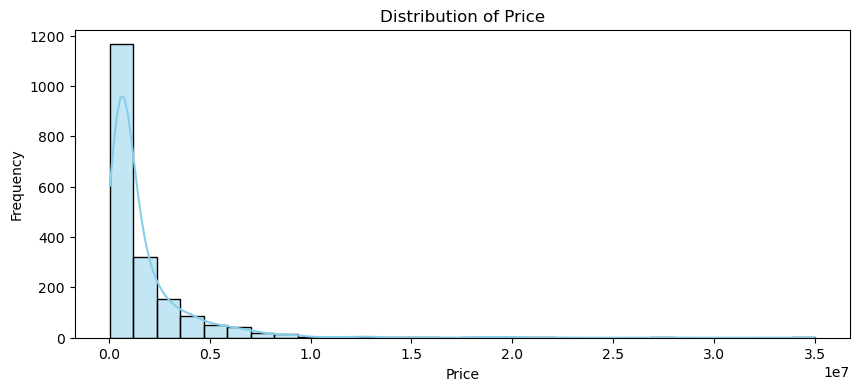

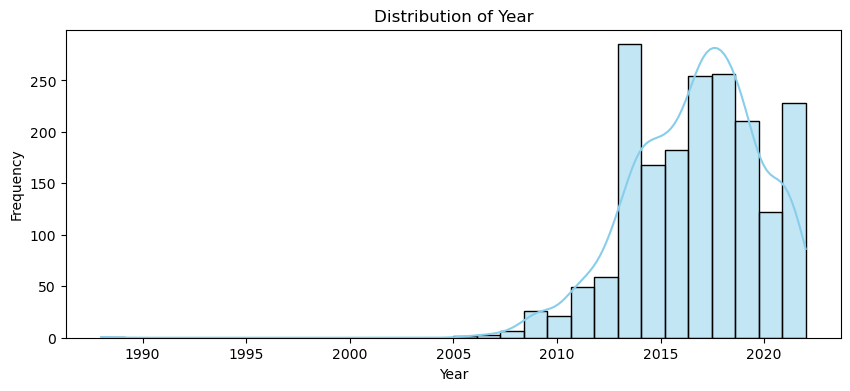

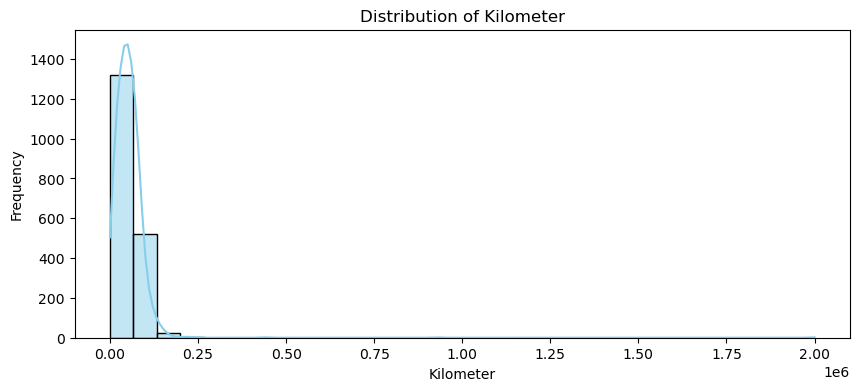

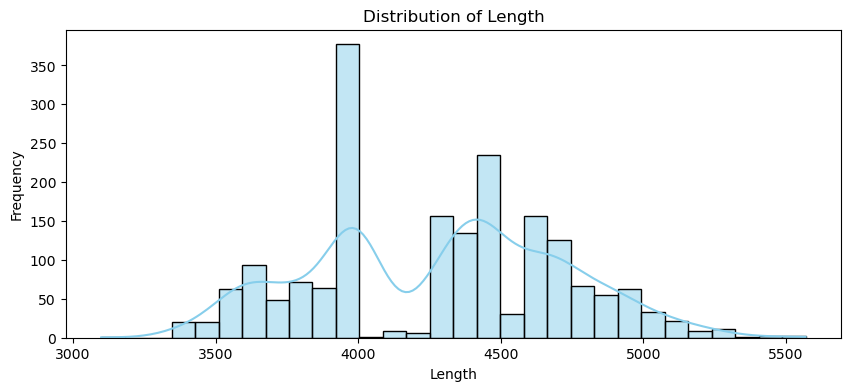

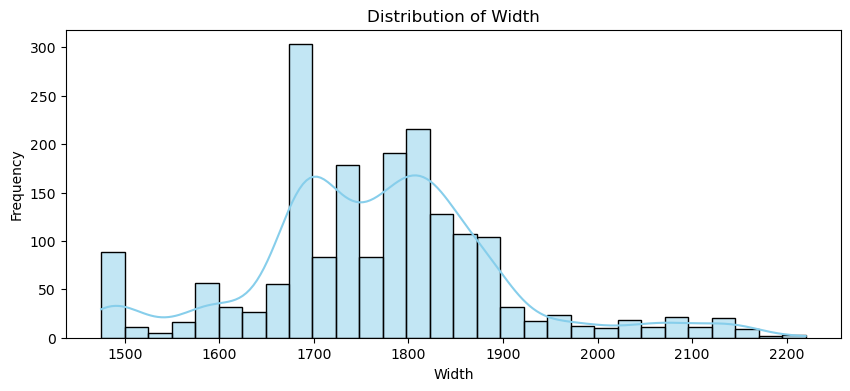

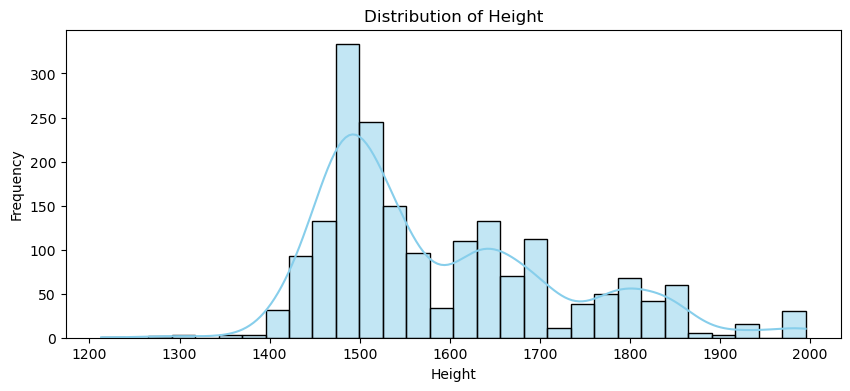

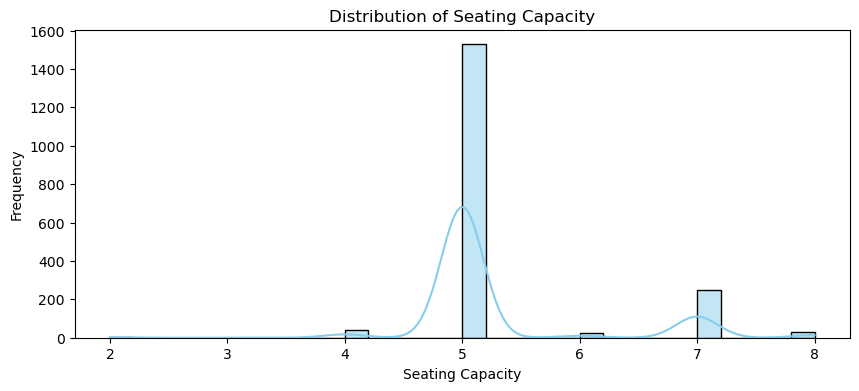

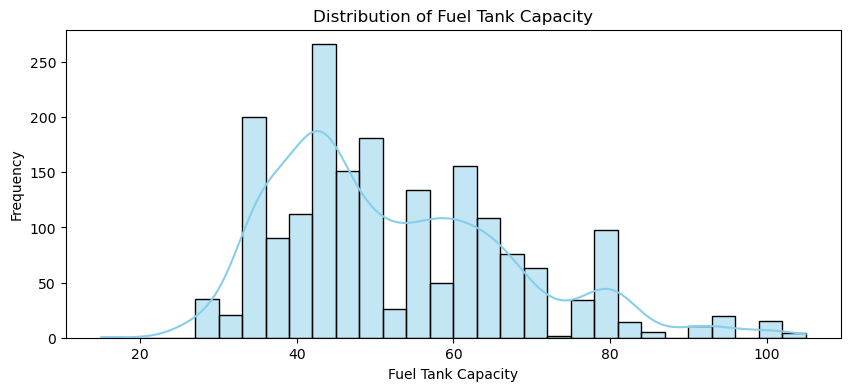

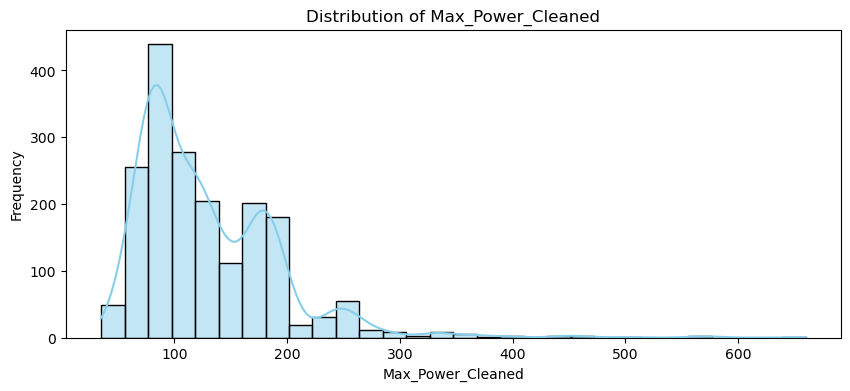

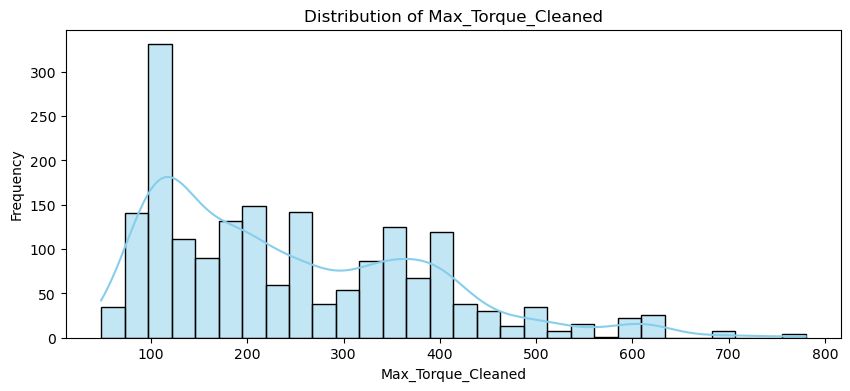

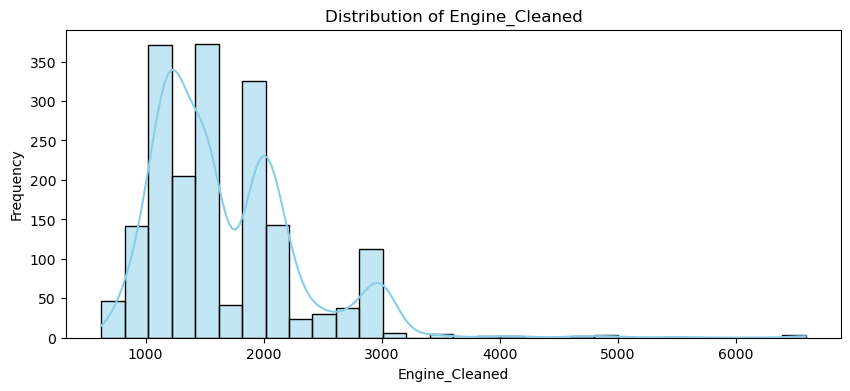

In [371]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [372]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print("Dataset size after removing Price outliers:", df.shape)


Dataset size after removing Price outliers: (1676, 23)


In [373]:
Q1 = df['Kilometer'].quantile(0.25)
Q3 = df['Kilometer'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Kilometer'] >= lower_bound) & (df['Kilometer'] <= upper_bound)]

print(f"Dataset shape after removing Kilometer outliers: {df.shape}")


Dataset shape after removing Kilometer outliers: (1643, 23)


In [374]:
df = df.drop(columns=['Max Torque','Max Power','Engine'])

In [375]:
new_skew=df[['Kilometer','Price']].skew()
new_skew

Kilometer    0.311496
Price        1.443453
dtype: float64

In [376]:
corr=df.select_dtypes(include='number').corr()

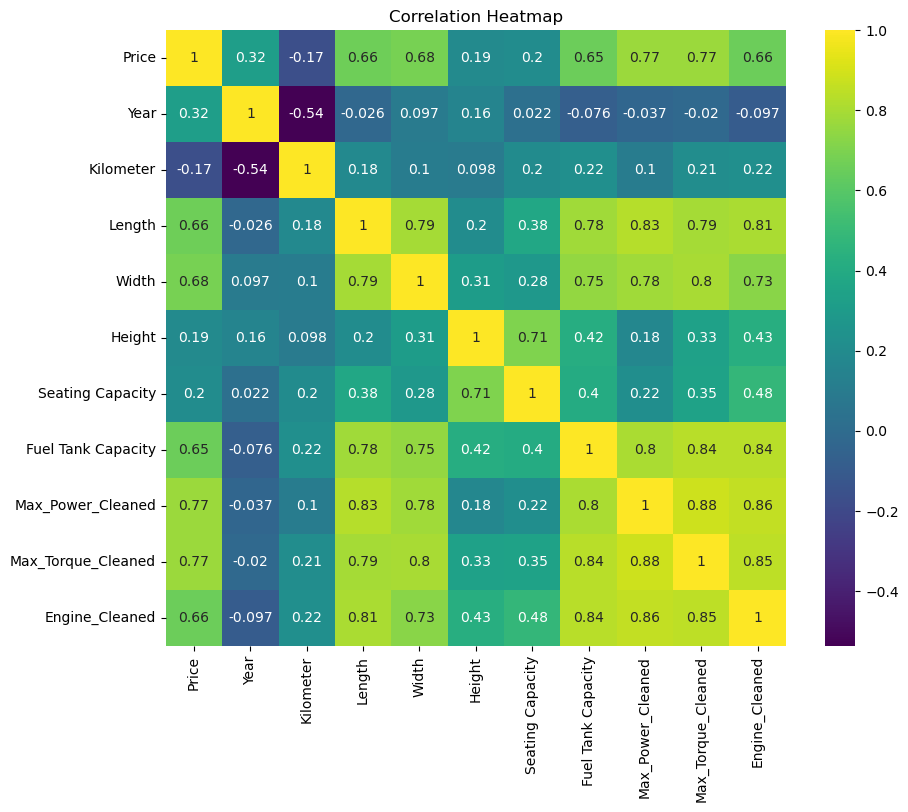

In [377]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="viridis") 
plt.title("Correlation Heatmap")
plt.show()

In [378]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Drivetrain'],
      dtype='object')


In [379]:
categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission', 
                    'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain']

unique_counts = df[categorical_cols].nunique()
print(unique_counts)


Make             28
Model           845
Fuel Type         6
Transmission      2
Location         75
Color            16
Owner             4
Seller Type       3
Drivetrain        3
dtype: int64


In [380]:
label_cols = ['Make', 'Model', 'Location']
encoders = {}
options_dict = {} 

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[f'le_{col.lower()}'] = le
    options_dict[col] = le.classes_.tolist()  


onehot_cols = ['Fuel Type', 'Transmission', 'Color', 'Owner', 'Seller Type', 'Drivetrain']
onehot_cols = [col for col in onehot_cols if col in df.columns]

for col in onehot_cols:
    options_dict[col] = sorted(df[col].astype(str).unique().tolist())  

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [381]:
X = df.drop('Price', axis=1) 
y = df['Price']       


In [382]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [383]:
gbr = GradientBoostingRegressor(
    n_estimators=500,     
    learning_rate=0.05,   
    max_depth=3,          
    random_state=42
)

gbr.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [384]:
y_pred = gbr.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)


MSE: 38601291044.05604
RMSE: 196472.1126370255
R^2 Score: 0.9481848064789217


In [385]:
import pickle

with open("gbr_model.pkl", "wb") as f:
    pickle.dump(gbr, f)
    
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

with open("categorical_options.pkl", "wb") as f:
    pickle.dump(options_dict, f)

print("Encoders and categorical options saved!")


Encoders and categorical options saved!
